In [1]:
import numpy as np
import scipy as sc
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from datetime import datetime, date
import calendar
from time import ctime

Here we use Km as unit of distance and 
second as unit of time

In [2]:
#initia Conditions

Rs= 20                            #in unit of solar radius
R0 = Rs*695700                   # unit is Km
V0=1000                          # unit is km/s
w=400                            # which is ambient solar wind speed in unit of km/s 
Gamma=0.2
gamma=Gamma*10**(-7)  # unit is km-1
Time_UTC=datetime(2012,10,28,1,0,0)    #input utc time in format (year,month,date,hr,minute,second)

# Approch-1

In [3]:
def dbm(x,t):
    r,v=x
    dxdt=[v,-gamma*(v-w)*np.abs(v-w)]
    return dxdt

In [4]:
ts = calendar.timegm(Time_UTC.timetuple())  #this command provide second correspond to given input time
t=np.arange(ts,ts+388010,0.1)
Y0=[R0,V0]
Y=odeint(dbm,Y0,t)

R=Y[:,0]/695700             # from now onwards we take solar radius as unit of distance
V=Y[:,1]


In [6]:
#we calculate speed and distance at alpha angle
def R_alpha(omega,alpha):
    omega=np.deg2rad(omega)
    alpha=np.deg2rad(alpha)
    return (R *(np.cos(alpha) +((np.tan(omega))**2 - (np.sin(alpha))**2)**0.5)/(1+ np.tan(omega)))
    
    
def V_alpha(omega,alpha):
    omega=np.deg2rad(omega)
    alpha=np.deg2rad(alpha)
    return V*(np.cos(alpha) +((np.tan(omega))**2 - (np.sin(alpha))**2)**0.5)/(1+ np.tan(omega))    

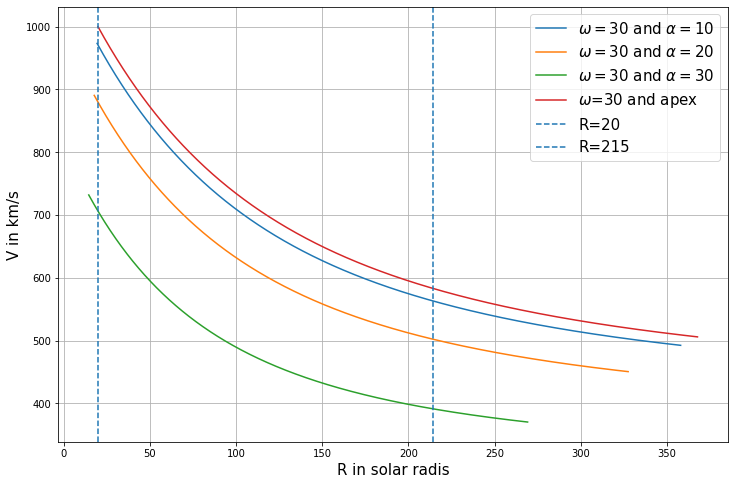

In [10]:
plt.figure(figsize=(12,8))
plt.plot(R_alpha(30,10),V_alpha(30,10),label=r"$\omega=30$ and $\alpha=10$")
plt.plot(R_alpha(30,20),V_alpha(30,20),label=r"$\omega=30$ and $\alpha=20$")
plt.plot(R_alpha(30,30),V_alpha(30,30),label=r"$\omega=30$ and $\alpha=30$")
plt.plot(R_alpha(30,0),V_alpha(30,0),label="$\omega$=30 and apex")
plt.axvline(x=20,linestyle="dashed",label="R=20")
plt.axvline(x=214,linestyle="dashed",label="R=215")
plt.xlabel("R in solar radis",fontsize=15)
plt.ylabel("V in km/s",fontsize=15)
plt.legend(fontsize=15,loc=1)
plt.grid()
#plt.savefig("VR.png")

Text(0, 0.5, 'R (R_sun)')

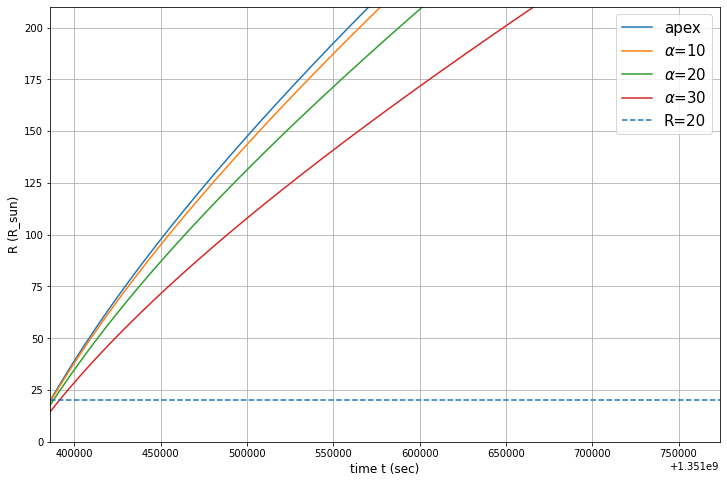

In [8]:
plt.figure(figsize=(12,8))
plt.plot(t,R_alpha(30,0),label="apex")
plt.plot(t,R_alpha(30,10),label=r"$\alpha$=10")
plt.plot(t,R_alpha(30,20),label=r"$\alpha$=20")
plt.plot(t,R_alpha(30,30),label=r"$\alpha$=30")
plt.axhline(y=20,linestyle="dashed",label="R=20")
#plt.axhline(y=214,linestyle="dashed",label="R=214")
plt.legend(fontsize=15)
plt.xlim(ts,ts+388000)
plt.ylim(0,210)
plt.grid()
plt.xlabel("time t (sec)",fontsize=12)
plt.ylabel("R (R_sun)",fontsize=12)
#plt.savefig("r1.png")

In [11]:
def find_nearest(d,v, value):
    array = np.asarray(d)
    idx = (np.abs(array - value)).argmin()
    v=v[idx]
    T=(t[idx]-t[0])/3600
    T_Utc=datetime.utcfromtimestamp(t[idx])
    t_UTC=ctime(t[idx])
    return T,v,T_Utc,t_UTC

A=find_nearest(R,V,1.0000000000)

print("Transit time of CME is " +str(A[0]) + " hr")
print("Imapact speed of CME at 1 Au is " +str(A[1]) +" Km/s")
print("Arrival time of CME in UTC is "+ str(A[2]))

print("\nwhile value of T and V from webtool is 52.87 hr and 583 km/s respectively ")

Transit time of CME is 0.0 hr
Imapact speed of CME at 1 Au is 1000.0 Km/s
Arrival time of CME in UTC is 2012-10-28 01:00:00

while value of T and V from webtool is 52.87 hr and 583 km/s respectively 
